In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

In [41]:
input_file = 'data/76-molecular-data.csv'
data = pd.read_csv(input_file)

In [42]:
data

,Drug,RdRp Binding energy(kcal/mol),Mpro Binding energy(kcal/mol),TPSA,MW,XLogP3-AA,HBD,HBA,n-ROTB,n-H,n-N,n-O,n-F,n-C,n-Benzene ring,n-single bonds,n-double bonds
0,Raltegravir,-9.7,-9.1,152.24,444.423,0.91152,3,9,11,21,6,5,1,20,3,35,3
1,Daclatasvir,-9.5,-7.2,174.64,738.890,6.22200,4,8,17,50,8,6,0,40,4,83,4
2,Simeprevir,-9.3,-8.7,156.89,749.956,5.25412,2,10,13,47,5,7,0,38,3,83,6
3,Dolutegravir,-8.9,-8.6,100.87,419.384,1.35280,2,6,5,19,3,5,2,20,2,37,3
4,Cobicistat,-8.4,-7.4,138.02,776.042,6.00070,3,10,22,53,7,5,0,40,4,86,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Doconasol,-5.3,-4.4,45.51,481.379,6.20430,0,5,7,22,2,3,0,26,4,36,0
72,Amantadine,-5.2,-4.6,26.02,151.253,1.91390,1,1,1,17,1,0,0,10,0,30,0
73,Zalcitabine,-5.2,-6.0,90.37,211.221,-0.50460,2,6,4,13,3,3,0,9,1,22,1
74,Foscarnet,-4.8,-4.5,94.83,126.004,-0.15790,3,5,3,3,0,5,0,1,0,7,2


In [43]:
X = data.drop(columns=['RdRp Binding energy(kcal/mol)', 'Mpro Binding energy(kcal/mol)', 'Drug'])
y_RdRp = data['RdRp Binding energy(kcal/mol)']
y_Mpro = data['Mpro Binding energy(kcal/mol)']

X_train, X_test, y_train, y_test = train_test_split(X, y_RdRp, test_size=0.2, random_state=42)

In [44]:
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

In [45]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
rmrpe = ((((y_test - y_pred.flatten()) / y_test) ** 2).mean()) ** 0.5 * 100
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Square Relative Percent Error: {rmrpe}%')

Mean Squared Error: 0.6265799650646453
Root Mean Squared Error: 0.7915680419677422
R^2 Score: 0.4772374167105031
Root Mean Square Relative Percent Error: 10.210428692707737%


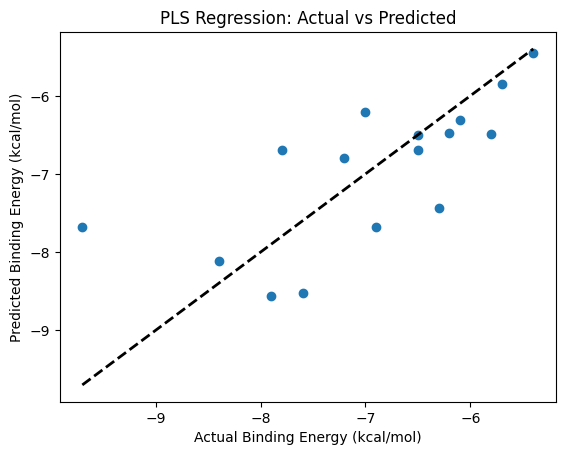

In [46]:
# visualize the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Binding Energy (kcal/mol)')
plt.ylabel('Predicted Binding Energy (kcal/mol)')
plt.title('PLS Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()